## 3. Intepolação polinomial

**Exemplo 2:** 

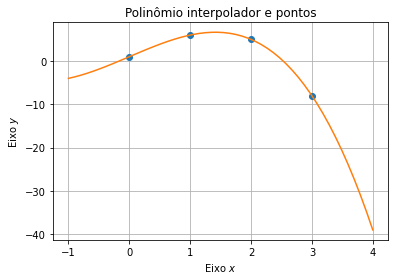

In [4]:
import matplotlib.pyplot as plt
import numpy as np

xi = np.array([0,1,2,3])
yi = np.array([1,6,5,-8])

x = np.linspace(-1,4)
y = 1+6*x-x**3

plt.plot(xi,yi,'o',x,y)

# Definindo textos e linhas de grade
plt.title('Polinômio interpolador e pontos')
plt.ylabel('Eixo $y$')
plt.xlabel('Eixo $x$')
plt.grid()

In [5]:
A = np.array([xi**0,xi**1,xi**2,xi**3]).T
#ou  A = np.polynomial.polynomial.polyvander(xi,3)
ai = np.linalg.solve(A,yi)
coeffs = np.flipud(ai) # reverte a ordem

print ("Coeficientes:", coeffs)
print ("P(xi):", np.polyval(coeffs,xi))

Coeficientes: [-1. -0.  6.  1.]
P(xi): [ 1.  6.  5. -8.]


**Exemplo 3.3:**

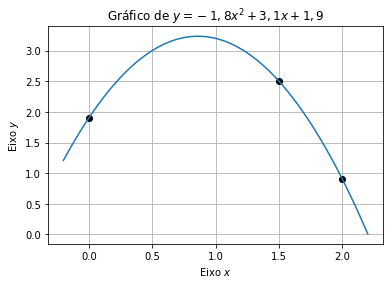

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = [0.0, 1.5, 2.0]
y = [1.9, 2.5, 0.9]

def P(x): 
    return -1.8*x**2+3.1*x+1.9

xi= np.linspace(-0.2, 2.2)
plt.plot(x, y, 'ko', xi, P(xi),'C0-')

plt.title('Gráfico de $y=-1,8x^2+3,1x+1,9$')
plt.ylabel('Eixo $y$')
plt.xlabel('Eixo $x$')
plt.grid()

P( 0.9 ) = 3.232


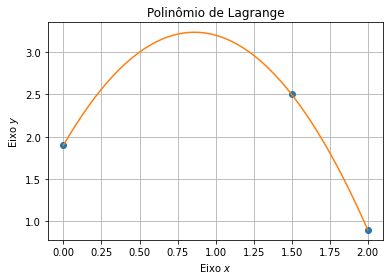

In [8]:
import matplotlib.pyplot as plt
import numpy as np
X = [0.0, 1.5, 2.0]
Y = [1.9, 2.5, 0.9]

def calculaP(x,X,Y):
    valor = 0
    for k in range(len(X)):
        lk = 1.0
        for i in range(len(X)):
            if k != i:
                lk = lk*(x-X[i])/(X[k]-X[i])
        valor = valor+Y[k]*lk 
    return valor

print ("P(",0.9,") =", calculaP(0.9, X,Y))

xp = np.linspace(X[0], X[-1])
yp = []

for x in xp:
    y = calculaP(x, X, Y)
    yp.append(y)

plt.plot(X, Y, 'o', xp, yp,'-',)
plt.title('Polinômio de Lagrange')
plt.ylabel('Eixo $y$')
plt.xlabel('Eixo $x$')
plt.grid()

**Exemplo 3.4:** 

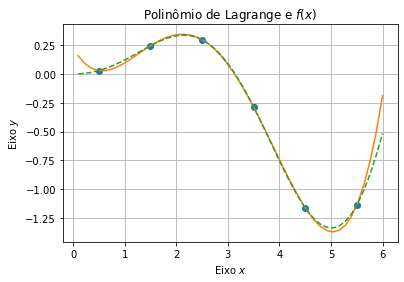

In [9]:
import matplotlib.pyplot as plt
from numpy import sin,log,linspace

f = lambda x:(0.2*x**2*sin(x))/log((1+x)**2)
xi = linspace(0.5,5.5,6)
yi = f(xi)

xp = linspace(0.1, 6)
yp = []
for x in xp:
    y = calculaP(x, xi, yi)
    yp.append(y)

plt.plot(xi, yi, 'o', 
         xp, yp,'-',
         xp,f(xp),'--')

plt.title('Polinômio de Lagrange e $f(x)$')
plt.ylabel('Eixo $y$')
plt.xlabel('Eixo $x$')
plt.grid()

**Exemplo 3.5:** 

Considere a função $f(x) = \cos(x)$. Obtenha uma aproximação para $f(0.3)$ usando um polinômio de grau 2 com $x_0 = 0.2$ e $h=0.2$.

0.9551537603289194


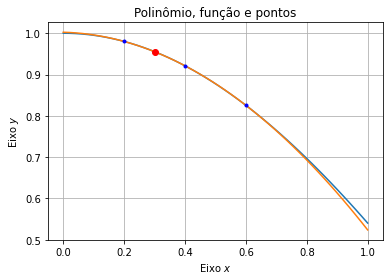

In [12]:
import numpy as np

def calculaP(u):
    valor = 0
    for k in range(len(X)):
        lk = 1.0
        for i in range(len(X)):
            if k != i:
                lk = lk*(u - i)/(k-i)
        valor = valor + Y[k]*lk 
    return valor
X = np.linspace(0.2, 0.6, 3)
Y = np.cos(X)

h = X[1]-X[0]
u = (0.3 - X[0])/h

print (calculaP(u))

xplot = np.linspace(0, 1.0)
pplot = calculaP((xplot-X[0])/h)
P = calculaP((X - X[0])/h)
plt.plot(xplot, np.cos(xplot), 
         xplot, pplot,
         X, P, 'b.',
         0.3, calculaP(u), 'ro')
plt.title('Polinômio, função e pontos')
plt.ylabel('Eixo $y$')
plt.xlabel('Eixo $x$')
plt.grid()

In [13]:
x = np.array([1.,2.,4.,5.,8.])
f = 1/x
(f[1:]-f[0:-1])/(x[1:]-x[0:-1])

array([-0.5  , -0.125, -0.05 , -0.025])

In [14]:
n = len(x)
for i in range(1,n+1):
    print (f)
    f= (f[1:]-f[0:-1])/(x[i:n]-x[0:n-i])

[1.    0.5   0.25  0.2   0.125]
[-0.5   -0.125 -0.05  -0.025]
[0.125   0.025   0.00625]
[-0.025    -0.003125]
[0.003125]


In [15]:
f = 1/x
for i in range(1,n):
    f[i:n] = (f[i:n]-f[i-1])/(x[i:n]-x[i-1])
print (f)

[ 1.       -0.5       0.125    -0.025     0.003125]


**Exemplo 3.7:**

[ 0.          1.46869394 -4.50049655 -2.26454299  2.25023479]


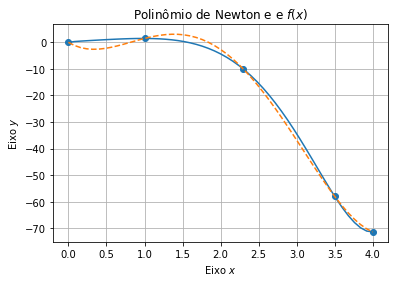

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Criando a lista de pontos 
func = lambda x: np.exp(x)*np.cos(x)*np.sqrt(x)
xi = np.array([ 0, 1.0, 2.3, 3.5, 4.0])
yi = func(xi)

# Função para as diferenças divididas
def difdiv(x,y):
    m = len(x)
    dd = y.copy()
    for k in range(1,m):
        dd[k:m]=(dd[k:m]-dd[k-1])/(x[k:m]-x[k-1])
    return dd
f = difdiv(xi,yi)
print(f)

def calculaP(f,xi,x):
    n = len(xi) - 1
    p = f[n]
    for i in range(1,n+1):
        p = f[n-i] + (x -xi[n-i])*p
    return p

# Cria pontos e calcula os valores para o plot
xp = np.linspace(0, 4, num=51) 
yp = []
for x in xp:
    y = calculaP(f,xi,x)
    yp.append(y)
plt.plot(xi, yi, 'C0 o', 
         xp, func(xp),'-', 
         xp, yp,'--')

plt.title('Polinômio de Newton e e $f(x)$')
plt.ylabel('Eixo $y$')
plt.xlabel('Eixo $x$')
plt.grid()

In [17]:
import sympy
x = sympy.symbols("x", real=True)

n = len(xi) - 1
p = f[n]
for i in range(1,n+1):
    p = f[n-i] + (x -xi[n-i])*p
sympy.expand(p)

2.25023478908295*x**4 - 17.566139553712*x**3 + 34.1382471378265*x**2 - 17.3536484332815*x

**Exemplo 3.8:**

[ 0.          0.5        -0.16666667]
P(1.3) = 0.5850000000000001


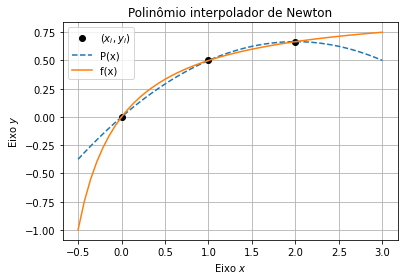

In [18]:
import matplotlib.pyplot as plt
import numpy as np

xi = np.array([0., 1.0, 2.0])
func = lambda x: np.divide(x, x + 1)
yi = func(xi)

f = difdiv(xi,yi)
print (f)
print ("P(1.3) =", calculaP(f,xi,1.3))


xp = np.linspace(-0.5, 3)
yp = []

for x in xp:
    yp.append(calculaP(f,xi,x))

plt.plot(xi, yi, "ko", 
         xp, yp, "--",
         xp, func(xp),"-")

plt.title('Polinômio interpolador de Newton')
plt.legend(['$(x_i, y_i)$', 'P(x) ', 'f(x) '])
plt.ylabel('Eixo $y$')
plt.xlabel('Eixo $x$')
plt.grid()

[-0.16666667  0.66666667  0.        ]


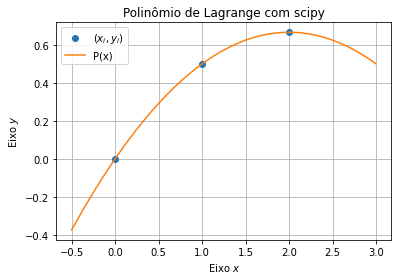

In [19]:
from scipy.interpolate import lagrange
a = lagrange(xi, yi)
print(a.coef)
plt.plot(xi, yi, 'o', 
        xp, np.polyval(a,xp))

plt.title('Polinômio de Lagrange com scipy')
plt.legend(['$(x_i, y_i)$', 'P(x) ', 'f(x) '])
plt.ylabel('Eixo $y$')
plt.xlabel('Eixo $x$')
plt.grid()
plt.show()